In [4]:
import pyodbc

In [5]:
server = 'DESKTOP-G833ESR'
database = 'AdventureWorks2022'
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)



In [6]:
import pandas as pd
query = 'SELECT * FROM Production.Product'
result = pd.read_sql(query, conn)

# Muestra el resultado
result.head()


C:\Users\SanJoXx\AppData\Local\Temp\ipykernel_5852\2019487320.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(query, conn)


,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08 10:01:36.827
3,4,Headset Ball Bearings,BE-2908,False,False,None,800,600,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08 10:01:36.827
4,316,Blade,BL-2036,True,False,None,800,600,0.0,0.0,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08 10:01:36.827


In [9]:
query = 'SELECT Name, ProductNumber, ListPrice AS Price FROM Production.Product'
result = pd.read_sql(query, conn)

result.head()

C:\Users\SanJoXx\AppData\Local\Temp\ipykernel_5852\1642566640.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql(query, conn)


,Name,ProductNumber,Price
0,Adjustable Race,AR-5381,0.0
1,Bearing Ball,BA-8327,0.0
2,BB Ball Bearing,BE-2349,0.0
3,Headset Ball Bearings,BE-2908,0.0
4,Blade,BL-2036,0.0


In [10]:
from sklearn.ensemble import IsolationForest

In [11]:
numeric_columns = result.select_dtypes(include=['float64', 'int64']).columns

In [12]:
model = IsolationForest(contamination=0.05)

In [13]:
model.fit(result[numeric_columns])

IsolationForest(contamination=0.05)

In [14]:
predictions = model.predict(result[numeric_columns])

In [15]:
result['anomaly'] = predictions

In [16]:
anomalies = result[result['anomaly'] == -1]
print("Instancias etiquetadas como anomalías:")
print(anomalies)

Instancias etiquetadas como anomalías:
                        Name ProductNumber    Price  anomaly
253         Road-150 Red, 62    BK-R93R-62  3578.27       -1
254         Road-150 Red, 44    BK-R93R-44  3578.27       -1
255         Road-150 Red, 48    BK-R93R-48  3578.27       -1
256         Road-150 Red, 52    BK-R93R-52  3578.27       -1
257         Road-150 Red, 56    BK-R93R-56  3578.27       -1
275  Mountain-100 Silver, 38    BK-M82S-38  3399.99       -1
276  Mountain-100 Silver, 42    BK-M82S-42  3399.99       -1
277  Mountain-100 Silver, 44    BK-M82S-44  3399.99       -1
278  Mountain-100 Silver, 48    BK-M82S-48  3399.99       -1
279   Mountain-100 Black, 38    BK-M82B-38  3374.99       -1
280   Mountain-100 Black, 42    BK-M82B-42  3374.99       -1
281   Mountain-100 Black, 44    BK-M82B-44  3374.99       -1
282   Mountain-100 Black, 48    BK-M82B-48  3374.99       -1
283  Mountain-200 Silver, 38    BK-M68S-38  2319.99       -1
284  Mountain-200 Silver, 42    BK-M68S-42  23

In [17]:
anomalies = result[result['anomaly'] == 1]
print("Instancias etiquetadas como anomalías:")
print(anomalies)

Instancias etiquetadas como anomalías:
                      Name ProductNumber   Price  anomaly
0          Adjustable Race       AR-5381    0.00        1
1             Bearing Ball       BA-8327    0.00        1
2          BB Ball Bearing       BE-2349    0.00        1
3    Headset Ball Bearings       BE-2908    0.00        1
4                    Blade       BL-2036    0.00        1
..                     ...           ...     ...      ...
499      ML Bottom Bracket       BB-8107  101.24        1
500      HL Bottom Bracket       BB-9108  121.49        1
501     Road-750 Black, 44    BK-R19B-44  539.99        1
502     Road-750 Black, 48    BK-R19B-48  539.99        1
503     Road-750 Black, 52    BK-R19B-52  539.99        1

[481 rows x 4 columns]


In [18]:
###########################################################

In [19]:
string_columns = result.select_dtypes(include=['object']).columns

In [20]:
model = IsolationForest(contamination=0.1)

In [21]:
model.fit(pd.concat([result[numeric_columns], pd.get_dummies(result[string_columns])], axis=1))

IsolationForest(contamination=0.1)

In [22]:
predictions = model.predict(pd.concat([result[numeric_columns], pd.get_dummies(result[string_columns])], axis=1))

In [23]:
result['anomaly'] = predictions

In [33]:
anomalies = result[result['anomaly'] == -1]
print("Instancias etiquetadas como anomalías:")
print(anomalies)

Instancias etiquetadas como anomalías:
                                 Name ProductNumber     Price  anomaly
18                   Touring End Caps       EC-T209     0.000       -1
34                       LL Grip Tape       GT-0820     0.000       -1
37                 Thin-Jam Hex Nut 9       HJ-1213     0.000       -1
48                Thin-Jam Hex Nut 14       HJ-5818     0.000       -1
51                Thin-Jam Hex Nut 12       HJ-9080     0.000       -1
67                          Hex Nut 2       HN-5400     0.000       -1
80                       Keyed Washer       KW-4091     0.000       -1
84             External Lock Washer 5       LE-1400     0.000       -1
99             Internal Lock Washer 2       LI-8000     0.000       -1
109               Thin-Jam Lock Nut 4       LJ-5162     0.000       -1
120                        Lock Nut 7       LN-1224     0.000       -1
129                       Lock Nut 11       LN-5162     0.000       -1
138                       Lock Nut 18 

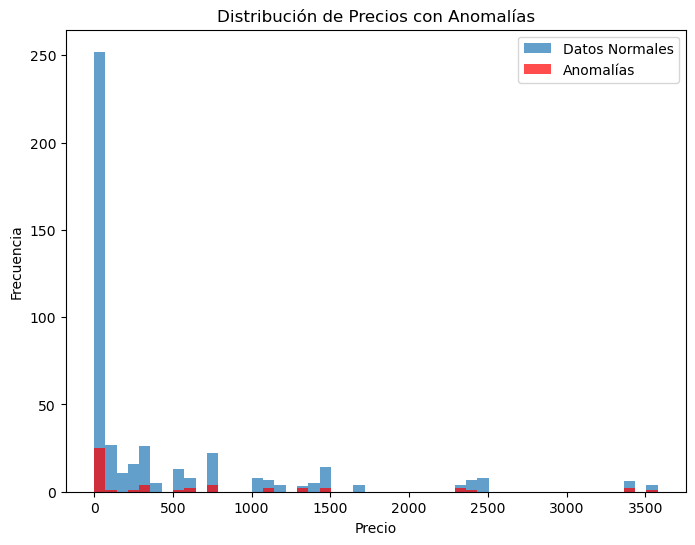

In [24]:
import matplotlib.pyplot as plt

# Filtrar las anomalías y los datos normales
anomalies = result[result['anomaly'] == -1]
normal_data = result[result['anomaly'] == 1]

# Graficar la distribución de precios
plt.figure(figsize=(8, 6))
plt.hist(normal_data['Price'], bins=50, alpha=0.7, label='Datos Normales')
plt.hist(anomalies['Price'], bins=50, alpha=0.7, label='Anomalías', color='red')

# Etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios con Anomalías')
plt.legend()

# Mostrar el gráfico
plt.show()

### Numérico

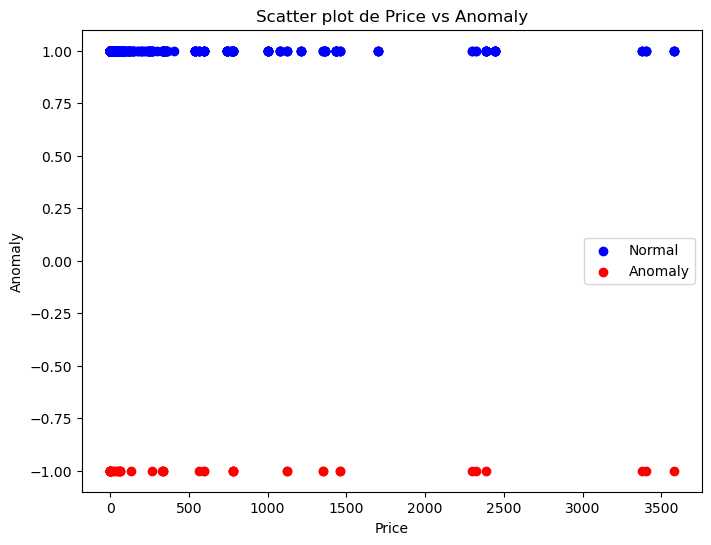

In [25]:
import matplotlib.pyplot as plt

# Scatter plot de 'Price' vs 'anomaly'
plt.figure(figsize=(8, 6))

# Scatter plot de puntos normales (anomaly == 1)
normal_points = result[result['anomaly'] == 1]
plt.scatter(normal_points['Price'], normal_points['anomaly'], color='blue', label='Normal')

# Scatter plot de puntos anómalos (anomaly == -1)
anomaly_points = result[result['anomaly'] == -1]
plt.scatter(anomaly_points['Price'], anomaly_points['anomaly'], color='red', label='Anomaly')

plt.xlabel('Price')
plt.ylabel('Anomaly')
plt.title('Scatter plot de Price vs Anomaly')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

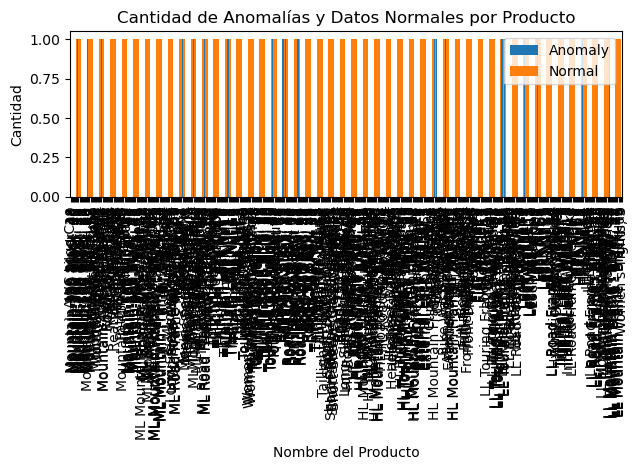

In [26]:
import matplotlib.pyplot as plt

# Contar la cantidad de anomalías y datos normales por nombre de producto
anomaly_counts = result[result['anomaly'] == -1]['Name'].value_counts()
normal_counts = result[result['anomaly'] == 1]['Name'].value_counts()

# Combinar las cuentas en un solo DataFrame
counts_df = pd.DataFrame({'Anomaly': anomaly_counts, 'Normal': normal_counts}).fillna(0)

# Ordenar el DataFrame por la suma de anomalías y datos normales
counts_df['Total'] = counts_df['Anomaly'] + counts_df['Normal']
counts_df = counts_df.sort_values('Total', ascending=False)

# Plotear el gráfico de barras
plt.figure(figsize=(12, 8))

counts_df[['Anomaly', 'Normal']].plot(kind='bar', stacked=True)
plt.xlabel('Nombre del Producto')
plt.ylabel('Cantidad')
plt.title('Cantidad de Anomalías y Datos Normales por Producto')
plt.legend(['Anomaly', 'Normal'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### String

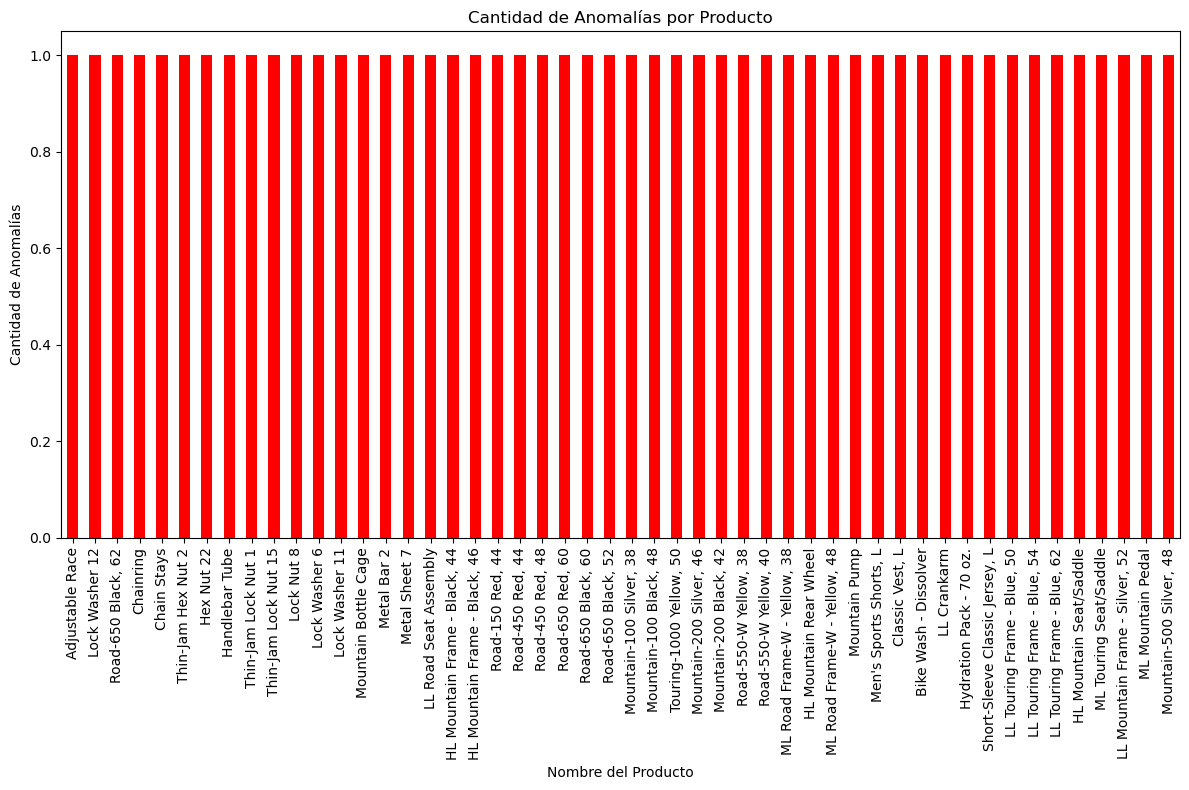

In [27]:
import matplotlib.pyplot as plt

# Obtener la cantidad de anomalías por nombre de producto
anomalies_count = anomalies['Name'].value_counts()

# Ordenar los resultados por la cantidad de anomalías de manera descendente
anomalies_count = anomalies_count.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

anomalies_count.plot(kind='bar', color='red')  # Crear el gráfico de barras

plt.xlabel('Nombre del Producto')  # Etiqueta del eje x
plt.ylabel('Cantidad de Anomalías')  # Etiqueta del eje y
plt.title('Cantidad de Anomalías por Producto')  # Título del gráfico

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar diseño para evitar superposiciones

plt.show()  # Mostrar el gráfico
